<a href="https://colab.research.google.com/github/REDi-school-ff22-Data-cycle/twitter-sentiment-analysis/blob/main/Twitter_Sentiment_P1_26_09_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Sentiment Analysis Climate Change

Challenge and data adquired from: https://www.kaggle.com/datasets/edqian/twitter-climate-change-sentiment-dataset?datasetId=413654

GitHub Repository: https://github.com/REDi-school-ff22-Data-cycle/twitter-sentiment-analysis



The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo.

This dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were annotated. Each tweet is labelled independently by 3 reviewers. This dataset only contains tweets that all 3 reviewers agreed on (the rest were discarded).

Each tweet is labelled as one of the following classes:

- 2(News): the tweet links to factual news about climate change
- 1(Pro): the tweet supports the belief of man-made climate change
- 0(Neutral: the tweet neither supports nor refutes the belief of man-made climate change
- -1(Anti): the tweet does not believe in man-made climate change

Tasks to follow: 
1. Create a code that loads and processes the data. 
2. Explore the dataset. 
3. Building the first model (Logistic regression): 

> 3.1 Preprocessing and data cleaning.

> 3.2 Creating a new df for analysing.

> 3.3 Vectorizing and spliting the data.

> 3.4 Testing the model




In [1]:
# this is a hack to allow displaying more than one result per notebook cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

# 1: Load and process the data 

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/REDi-school-ff22-Data-cycle/twitter-sentiment-analysis/main/twitter_sentiment_data.csv'
df = pd.read_csv(url)
df.head(5)

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


# 2: Exploring the dataset

In [3]:
# Shape
df.shape

(43943, 3)

In [4]:
# Distribution 
sentiment_count =df['sentiment'].value_counts().to_frame()
#sentiment_count

percentage = (sentiment_count * 100) / df.shape[0]
percentage 

,sentiment
1,52.254056
2,21.109164
0,17.556835
-1,9.079944


In [5]:
df.describe()

,sentiment,tweetid
count,43943.000000,4.394300e+04
mean,0.853924,8.367966e+17
std,0.853543,8.568506e+16
min,-1.000000,5.926334e+17
25%,0.000000,7.970376e+17
50%,1.000000,8.402301e+17
75%,1.000000,9.020003e+17
max,2.000000,9.667024e+17


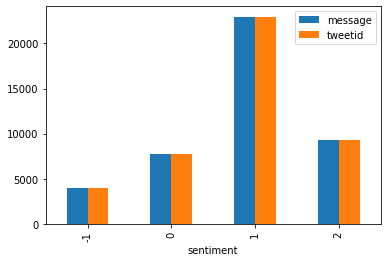

In [6]:
df.groupby('sentiment').count().plot(kind='bar')

In [7]:
# Check whether there is NAs 
df.isna().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

Word Clouds

In [8]:
import nltk
from nltk.corpus import stopwords
#print(stopwords.words('english'))

In [9]:
# We temporaly manually set the list because we got an error with the nltk stopword package. 
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [10]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

(-0.5, 399.5, 199.5, -0.5)

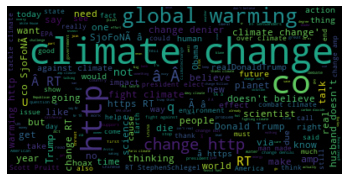

In [11]:
# Following https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud 


# Create stopword list:
#stopwords = set(STOPWORDS) #Error check later!!! 
#stopwords.update(["br", "href"])
stopwords = stopwordlist # Temporary ----
textt = ''.join(review for review in df.message)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [12]:
# Further Cloud words 
# Split the data set in each cathegory 

news = df[df['sentiment'] == 2]
positive = df[df['sentiment'] == 1]
neutral = df[df['sentiment'] == 0] 
against = df[df['sentiment'] == -1]


(-0.5, 399.5, 199.5, -0.5)

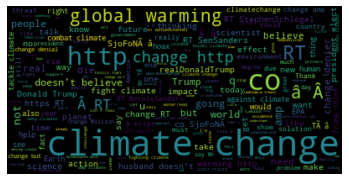

In [13]:
# Positive
#stopwords = set(STOPWORDS) # We need to fix this problem 
#stopwords.update(["br", "href","good","great"]) 
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.message)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

(-0.5, 399.5, 199.5, -0.5)

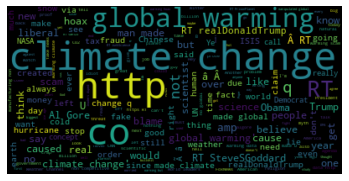

In [14]:
# Against
pos = " ".join(review for review in against.message)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
# We should try to clean it further (check the words: climate change, global...)

# 3: Building the Model 
3.1 Preprosessing the data and data cleaning 

In [18]:
!pip install better_profanity # Install it if needed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 2.7 MB/s 


In [19]:
from wordcloud import WordCloud
from better_profanity import profanity



In [ ]:
#!pip install stopwords # If needed

In [ ]:
# Function from: https://medium.com/@nikitasilaparasetty/twitter-sentiment-analysis-for-data-science-using-python-in-2022-6d5e43f6fa6e
# Create a function to clean the tweets. Remove profanity, unnecessary characters, spaces, and stopwords.
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# We decided not to use this function. It takes to much time to run the whole dataset. 
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

from wordcloud import WordCloud
from better_profanity import profanity
import numpy as np

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    r = tweet.lower()
    r = profanity.censor(r)
    r = re.sub("'", "", r) # This is to avoid removing contractions in english
    r = re.sub("@[A-Za-z0-9_]+","", r)
    r = re.sub("#[A-Za-z0-9_]+","", r)
    r = re.sub(r'http\S+', '', r)
    r = re.sub('[()!?]', ' ', r)
    r = re.sub('\[.*?\]',' ', r)
    r = re.sub("[^a-z0-9]"," ", r)
    r = r.split()
    stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
    r = [w for w in r if not w in stopwords]
    r = " ".join(word for word in r)
    return r

In [20]:
# Convert the column 'message' in a list 
# Convert only the tweets into a list

message_list = df.message.to_list()


In [ ]:
# Run the list of tweets through this function and display this cleaned list.

#cleaned_df = [clean_tweet(tw) for tw in message_list]
#cleaned_df.head(10)

In [21]:
# Just selecting a couple of rows to see whether it works: 
df_test = df.head(10)
df_test

# Making a list 
#test_message_list = df_test.message.to_list()
#cleaned_df_test = [clean_tweet(tw) for tw in test_message_list]

# Works directly from a df 
cleaned_df_test = [clean_tweet(tw) for tw in df_test.message]
cleaned_df_test


,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153
5,0,Unamshow awache kujinga na iko global warming ...,793125429418815489
6,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125430236684289
7,2,RT @CCIRiviera: Presidential Candidate #Donald...,793126558688878592
8,0,RT @AmericanIndian8: Leonardo DiCaprio's clima...,793127097854197761
9,1,#BeforeTheFlood Watch #BeforeTheFlood right he...,793127346106753028


NameError: ignored

21/09/22

Other preprosessing techniques: 

Source: https://github.com/Deffro/text-preprocessing-techniques/blob/master/techniques.py 



In [22]:
!pip install requests # If necessary 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
""" Copyright 2017, Dimitrios Effrosynidis, All rights reserved. """
# Functions for preprocessing data

#import re
from functools import partial
from collections import Counter
#import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
# For reading the slang document 
import urllib.request
import requests
import urllib
from urllib.request import urlopen
import urllib3

def removeUnicode(text):
    """ Removes unicode strings like "\u002c" and "x96" """
    text = re.sub(r'(\\u[0-9A-Fa-f]+)',r'', text)       
    text = re.sub(r'[^\x00-\x7f]',r'',text)
    return text

def replaceURL(text):
    """ Replaces url address with "url" """
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','url',text)
    text = re.sub(r'#([^\s]+)', r'\1', text)
    return text

def replaceAtUser(text):
    """ Replaces "@user" with "atUser" """
    text = re.sub('@[^\s]+','atUser',text)
    return text

def removeHashtagInFrontOfWord(text):
    """ Removes hastag in front of a word """
    text = re.sub(r'#([^\s]+)', r'\1', text)
    return text

def removeNumbers(text):
    """ Removes integers """
    text = ''.join([i for i in text if not i.isdigit()])         
    return text

def replaceMultiExclamationMark(text):
    """ Replaces repetitions of exlamation marks """
    text = re.sub(r"(\!)\1+", ' multiExclamation ', text)
    return text

def replaceMultiQuestionMark(text):
    """ Replaces repetitions of question marks """
    text = re.sub(r"(\?)\1+", ' multiQuestion ', text)
    return text

def replaceMultiStopMark(text):
    """ Replaces repetitions of stop marks """
    text = re.sub(r"(\.)\1+", ' multiStop ', text)
    return text

def countMultiExclamationMarks(text):
    """ Replaces repetitions of exlamation marks """
    return len(re.findall(r"(\!)\1+", text))

def countMultiQuestionMarks(text):
    """ Count repetitions of question marks """
    return len(re.findall(r"(\?)\1+", text))

def countMultiStopMarks(text):
    """ Count repetitions of stop marks """
    return len(re.findall(r"(\.)\1+", text))

def countElongated(text):
    """ Input: a text, Output: how many words are elongated """
    regex = re.compile(r"(.)\1{2}")
    return len([word for word in text.split() if regex.search(word)])

def countAllCaps(text):
    """ Input: a text, Output: how many words are all caps """
    return len(re.findall("[A-Z0-9]{3,}", text))

#""" Creates a dictionary with slangs and their equivalents and replaces them """
#slang_url ='https://raw.githubusercontent.com/Deffro/text-preprocessing-techniques/master/slang.txt'
#for line in urllib.request.urlopen(slang_url):
#    slang_txt = (line.decode('utf-8')) 

#with open(slang_txt) as file:
#    slang_map = dict(map(str.strip, line.partition('\t')[::2])
#    for line in file if line.strip())

#slang_words = sorted(slang_map, key=len, reverse=True) # longest first for regex
#regex = re.compile(r"\b({})\b".format("|".join(map(re.escape, slang_words))))
#replaceSlang = partial(regex.sub, lambda m: slang_map[m.group(1)])

#def countSlang(text):
#    """ Input: a text, Output: how many slang words and a list of found slangs """
#    slangCounter = 0
#    slangsFound = []
#    tokens = nltk.word_tokenize(text)
#    for word in tokens:
#        if word in slang_words:
#            slangsFound.append(word)
#            slangCounter += 1
#    return slangCounter, slangsFound

""" Replaces contractions from a string to their equivalents """
contraction_patterns = [ (r'won\'t', 'will not'), (r'can\'t', 'cannot'), (r'i\'m', 'i am'), (r'ain\'t', 'is not'), (r'(\w+)\'ll', '\g<1> will'), (r'(\w+)n\'t', '\g<1> not'),
                         (r'(\w+)\'ve', '\g<1> have'), (r'(\w+)\'s', '\g<1> is'), (r'(\w+)\'re', '\g<1> are'), (r'(\w+)\'d', '\g<1> would'), (r'&', 'and'), (r'dammit', 'damn it'), (r'dont', 'do not'), (r'wont', 'will not') ]
def replaceContraction(text):
    patterns = [(re.compile(regex), repl) for (regex, repl) in contraction_patterns]
    for (pattern, repl) in patterns:
        (text, count) = re.subn(pattern, repl, text)
    return text

def replaceElongated(word):
    """ Replaces an elongated word with its basic form, unless the word exists in the lexicon """

    repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
    repl = r'\1\2\3'
    if wordnet.synsets(word):
        return word
    repl_word = repeat_regexp.sub(repl, word)
    if repl_word != word:      
        return replaceElongated(repl_word)
    else:       
        return repl_word

def removeEmoticons(text):
    """ Removes emoticons from text """
    text = re.sub(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', '', text)
    return text

def countEmoticons(text):
    """ Input: a text, Output: how many emoticons """
    return len(re.findall(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', text))


### Spell Correction begin ###
""" Spell Correction http://norvig.com/spell-correct.html """
def words(text): return re.findall(r'\w+', text.lower())

#WORDS = Counter(words(open('corporaForSpellCorrection.txt').read()))

#def P(word, N=sum(WORDS.values())): 
#    """P robability of `word`. """
#    return WORDS[word] / N

def spellCorrection(word): 
    """ Most probable spelling correction for word. """
    return max(candidates(word), key=P)

def candidates(word): 
    """ Generate possible spelling corrections for word. """
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    """ The subset of `words` that appear in the dictionary of WORDS. """
    return set(w for w in words if w in WORDS)

def edits1(word):
    """ All edits that are one edit away from `word`. """
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    """ All edits that are two edits away from `word`. """
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

### Spell Correction End ###

### Replace Negations Begin ###

def replace(word, pos=None):
    """ Creates a set of all antonyms for the word and if there is only one antonym, it returns it """
    antonyms = set()
    for syn in wordnet.synsets(word, pos=pos):
      for lemma in syn.lemmas():
        for antonym in lemma.antonyms():
          antonyms.add(antonym.name())
    if len(antonyms) == 1:
      return antonyms.pop()
    else:
      return None

def replaceNegations(text):
    """ Finds "not" and antonym for the next word and if found, replaces not and the next word with the antonym """
    i, l = 0, len(text)
    words = []
    while i < l:
      word = text[i]
      if word == 'not' and i+1 < l:
        ant = replace(text[i+1])
        if ant:
          words.append(ant)
          i += 2
          continue
      words.append(word)
      i += 1
    return words

### Replace Negations End ###

def addNotTag(text):
	""" Finds "not,never,no" and adds the tag NEG_ to all words that follow until the next punctuation """
	transformed = re.sub(r'\b(?:not|never|no)\b[\w\s]+[^\w\s]', 
       lambda match: re.sub(r'(\s+)(\w+)', r'\1NEG_\2', match.group(0)), 
       text,
       flags=re.IGNORECASE)
	return transformed

def addCapTag(word):
    """ Finds a word with at least 3 characters capitalized and adds the tag ALL_CAPS_ """
    if(len(re.findall("[A-Z]{3,}", word))):
        word = word.replace('\\', '' )
        transformed = re.sub("[A-Z]{3,}", "ALL_CAPS_"+word, word)
        return transformed
    else:
        return word

' Copyright 2017, Dimitrios Effrosynidis, All rights reserved. '

' Replaces contractions from a string to their equivalents '

' Spell Correction http://norvig.com/spell-correct.html '

In [24]:
# Preprocessing our data set: 


# 1. Remove Unicode

cleaned_list_1 = []
for tweet in message_list: 
  string = removeUnicode(tweet)
  cleaned_list_1.append(string)

# 2. .Replace URL

cleaned_list_2 = []
for tweet in cleaned_list_1: 
  string = replaceURL(tweet)
  cleaned_list_2.append(string)

# 3. Replace @User

cleaned_list_3 = []
for tweet in cleaned_list_2: 
  string = replaceAtUser(tweet)
  cleaned_list_3.append(string)

# 4. Remove # in front of words 

cleaned_list_4 = []
for tweet in cleaned_list_3: 
  string = removeHashtagInFrontOfWord(tweet)
  cleaned_list_4.append(string)

# 5. Remove numbers

cleaned_list_5 = []
for tweet in cleaned_list_4: 
  string = removeNumbers(tweet)
  cleaned_list_5.append(string)

# 6. Replace multi exclamation marks 

cleaned_list_6 = []
for tweet in cleaned_list_5: 
  string = replaceMultiExclamationMark(tweet)
  cleaned_list_6.append(string)

# 7. Replace Multi Question Mark

cleaned_list_7 = []
for tweet in cleaned_list_6: 
  string = replaceMultiQuestionMark(tweet)
  cleaned_list_7.append(string)

# 8. Replace multistop Mark

cleaned_list_8 = []
for tweet in cleaned_list_7: 
  string = replaceMultiStopMark(tweet)
  cleaned_list_8.append(string)

# 9. Deal with slang

cleaned_list_9 = []
for tweet in cleaned_list_8: 
  string = replaceContraction(tweet)
  cleaned_list_9.append(string)

# We Skiped replaceElongated(word) It doesn't work.

# 10. Remove emoticons 
cleaned_list_10 = []
for tweet in cleaned_list_9: 
  string = removeEmoticons(tweet)
  cleaned_list_10.append(string)

# 11. Replace negations

#cleaned_list_11 = [] 

#Doesn´t work 
#for tweet in cleaned_list_10: 
#  string = replaceNegations(tweet)
#  cleaned_list_11.append(string)

In [25]:
cleaned_list_10

# Things we still need to do: 
# -We need to keep the cleaning: spelling, slang and check why do we still have some  ;, /, |. 
# -Join the list in a new df with the sentiments column.
# -Vectorize & split into test and train. 
# -Try to run model. 



['atUser climate change is an interesting hustle as it was global warming but the planet stopped warming for  yes while the suv boom',
 'RT atUser Watch BeforeTheFlood right here, as atUser travels the world to tackle climate change url htt',
 'Fabulous! Leonardo DiCaprio is film on climate change is brilliant multiExclamation  Do watch. url via atUser',
 'RT atUser Just watched this amazing documentary by leonardodicaprio on climate change. We all think this url',
 'RT atUser Pranita Biswasi, a Lutheran from Odisha, gives testimony on effects of climate change andamp; natural disasters on the po',
 'Unamshow awache kujinga na iko global warming url',
 'RT atUser Pranita Biswasi, a Lutheran from Odisha, gives testimony on effects of climate change andamp; natural disasters on the po',
 'RT atUser Presidential Candidate DonaldTrump is dangerous on climate change, says monaco s Prince Albert',
 'RT atUser Leonardo DiCaprio is climate change documentary is free for a week url\nINDIGENOUS 

3.2: Join the list in a new df with the sentiments column

In [54]:
# Join list in a new df with the sentiments. 
# We need to join: 'df.sentiment' & 'cleaned_list_10'

df2 = pd.DataFrame(list(zip(df.sentiment, cleaned_list_10)),
                   columns = ['sentiment', 'tweets'])
df2.head(10)

,sentiment,tweets
0,-1,atUser climate change is an interesting hustle...
1,1,"RT atUser Watch BeforeTheFlood right here, as ..."
2,1,Fabulous! Leonardo DiCaprio is film on climate...
3,1,RT atUser Just watched this amazing documentar...
4,2,"RT atUser Pranita Biswasi, a Lutheran from Odi..."
5,0,Unamshow awache kujinga na iko global warming url
6,2,"RT atUser Pranita Biswasi, a Lutheran from Odi..."
7,2,RT atUser Presidential Candidate DonaldTrump i...
8,0,RT atUser Leonardo DiCaprio is climate change ...
9,1,BeforeTheFlood Watch BeforeTheFlood right here...


In [42]:
df2.iloc[4:8]

,sentiment,tweets,random_number
4,2,"RT atUser Pranita Biswasi, a Lutheran from Odi...",0.237481
5,0,Unamshow awache kujinga na iko global warming url,2.103121
6,2,"RT atUser Pranita Biswasi, a Lutheran from Odi...",-0.437636
7,2,RT atUser Presidential Candidate DonaldTrump i...,0.599897


3.3: Vectorize & split into test and train

In [27]:
# -Vectorize & split into test and train.

Split the data frame into  train and test sets .80% of the data will be used for training, and 20% will be used for testing. 

Taken from: https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6

In [30]:
# Random split train and test data. 
import numpy as np
from sklearn.model_selection import train_test_split

#index = df2.index
#df2['random_number'] = np.random.randn(len(index))
#train = df2[df2['random_number'] <= 0.8]
#test = df2[df2['random_number'] > 0.8]

#train.head(10)

X_train, X_test, y_train, y_test = train_test_split(df2['tweets'], df2['sentiment'], test_size=0.33, random_state=42)

Create a bag of words
- Use a count vectorizer from the Scikit-learn library. 

This will transform the text in our data frame into a bag of words model, which will contain a sparse matrix of integers. The number of occurrences of each word will be counted and printed.

We will need to convert the text into a bag-of-words model since the logistic regression algorithm cannot understand text.


In [31]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(X_train)
test_matrix = vectorizer.transform(X_test)

Import logistic regression 

In [32]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

Fit the model on the data

In [34]:
# Error fitting the trains
#"Your session failed because all available RAM was used. If you want to access large RAM execution environments check Colab Pro"

lr.fit(train_matrix,y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

Make predictions 

In [35]:
predictions = lr.predict(test_matrix)

3.4 Testing 

In [36]:
# To test the accuracy of the model: 
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

# The results should be a confusion matrix 

array([[ 623,  149,  146,   22],
       [ 241, 1334,  566,  102],
       [ 337,  930, 6372,  641],
       [  68,  192,  485, 2294]])

In [37]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.49      0.66      0.56       940
           0       0.51      0.59      0.55      2243
           1       0.84      0.77      0.80      8280
           2       0.75      0.75      0.75      3039

    accuracy                           0.73     14502
   macro avg       0.65      0.70      0.67     14502
weighted avg       0.75      0.73      0.74     14502



In [ ]:
# Check the overall accuracy of the model on the test data, 


Session 26/09 
 Next tasks:

- Reduce the levels to 2 
- Over and undersampling (due to the different weights of the possitive and negative tweets)
- Try logistic regression again to see whether it works better. 
- Try different feature engineering techniques (Feature engineering techniques: bag of words, bi-gram, n-gram models, word2Vec, Word embeddings)
- Try different models (Naive Bayes Classifier, Support Vector Machines)

In [53]:
df2

In [56]:
from pickle import TRUE
# Function sentiment => 1 == positive
# sentiment =< 1 == negative 

# df3 = df2[df2['sentiment1'] >= 1]
df2['sentiment_1'] = df2['sentiment'].apply(lambda rating : +1 if rating >= 1 else -1)
#df2.head(10)

df2 = df2.drop(columns= ['sentiment'], )#inplace= True)
df2

,tweets,sentiment_1
0,atUser climate change is an interesting hustle...,-1
1,"RT atUser Watch BeforeTheFlood right here, as ...",1
2,Fabulous! Leonardo DiCaprio is film on climate...,1
3,RT atUser Just watched this amazing documentar...,1
4,"RT atUser Pranita Biswasi, a Lutheran from Odi...",1
...,...,...
43938,Dear atUser\nYeah right. Human Mediated Climat...,1
43939,What will your respective parties do to preven...,1
43940,RT atUser UN Poll Shows Climate Change Is the ...,1
43941,RT atUser i still can$q$t believe this gif of ...,-1


In [57]:
# Random split train and test data. 
import numpy as np
from sklearn.model_selection import train_test_split

#index = df2.index
#df2['random_number'] = np.random.randn(len(index))
#train = df2[df2['random_number'] <= 0.8]
#test = df2[df2['random_number'] > 0.8]

#train.head(10)

X_train, X_test, y_train, y_test = train_test_split(df2['tweets'], df2['sentiment_1'], test_size=0.33, random_state=42)

In [58]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(X_train)
test_matrix = vectorizer.transform(X_test)

In [59]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [60]:
# Fit
# Try to optimize it 
lr.fit(train_matrix,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [61]:
predictions = lr.predict(test_matrix)

In [62]:
# To test the accuracy of the model: 
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

# The results should be a confusion matrix

array([[2355,  795],
       [1519, 9833]])

In [63]:
print(classification_report(predictions,y_test))


              precision    recall  f1-score   support

          -1       0.61      0.75      0.67      3150
           1       0.93      0.87      0.89     11352

    accuracy                           0.84     14502
   macro avg       0.77      0.81      0.78     14502
weighted avg       0.86      0.84      0.85     14502

